### You can basically download any file directly from github using it's link , !git clone function

In [ ]:
!git clone 'https://github.com/Franck-Dernoncourt/pubmed-rct.git'

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (39/39), 177.08 MiB | 35.32 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.


In [ ]:
def reading_txtfile(filepath):
  with open(filepath,'r') as f:
    return (f.readlines())

### Converting a txt file into python list using `with open` function of python

In [ ]:
train_data=reading_txtfile('/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt')

In [ ]:
train_data[:10]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

### Creating a dictionary of the list created above

In [ ]:
# This is going to be a function that will be an all in one solution for the preprocessing of the data
def preprocess_text_with_line_numbers(filename):
  input_lines=reading_txtfile(filename)
  abstract_lines=''
  abstract_samples=[]

  for line in input_lines:
    if line.startswith('###'):
      abstract_id=line
      abstract_lines=''
    elif line.isspace():
      abstract_line_split=abstract_lines.splitlines()
      for abstract_line_number,abstract_line in enumerate(abstract_line_split):
        line_data={}
        target_text_split=abstract_line.split('\t')
        line_data["target"] = target_text_split[0]
        line_data["text"] = target_text_split[1].lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(abstract_line_split) - 1
        abstract_samples.append(line_data)

    else:
      abstract_lines+=line

  return(abstract_samples)




### We are here working on pubmed 20k RCT (randomized control trial)

In [ ]:
train_data=preprocess_text_with_line_numbers('/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt')
test_data=preprocess_text_with_line_numbers('/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt')
val_data=preprocess_text_with_line_numbers('/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt')

In [ ]:
import pandas as pd # Coverting all the dictionary data into pandas DataFrame
train_df=pd.DataFrame(train_data)
test_df=pd.DataFrame(test_data)
val_df=pd.DataFrame(val_data)
train_df.head(14)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


<Axes: ylabel='Frequency'>

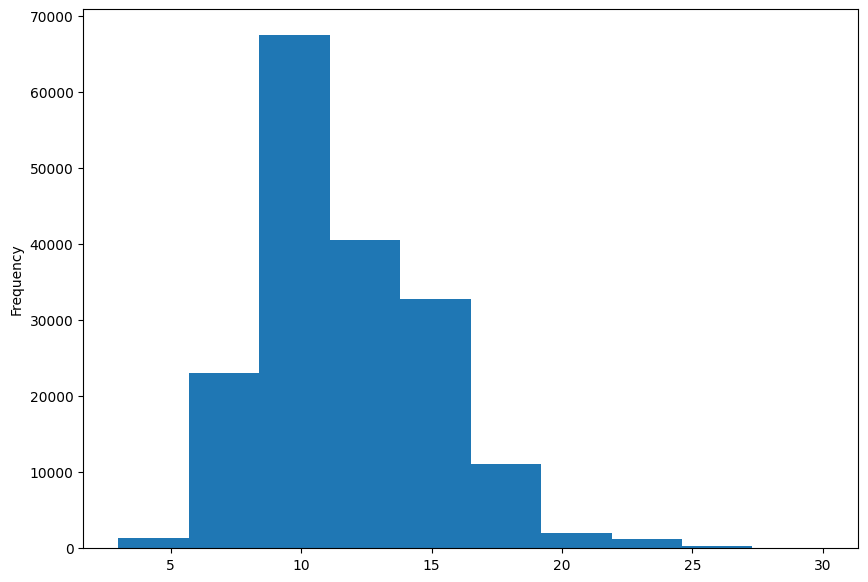

In [ ]:
train_df['total_lines'].plot(kind='hist',figsize=(10,7)) #plotting the total lines distribution in historgram

In [ ]:
vc=train_df['target'].value_counts() # Checking for any imbalances in the data
vc.to_list(),vc

([59353, 57953, 27168, 21727, 13839],
 target
 METHODS        59353
 RESULTS        57953
 CONCLUSIONS    27168
 BACKGROUND     21727
 OBJECTIVE      13839
 Name: count, dtype: int64)

### Some more data analysis on the dataset

<Axes: ylabel='target'>

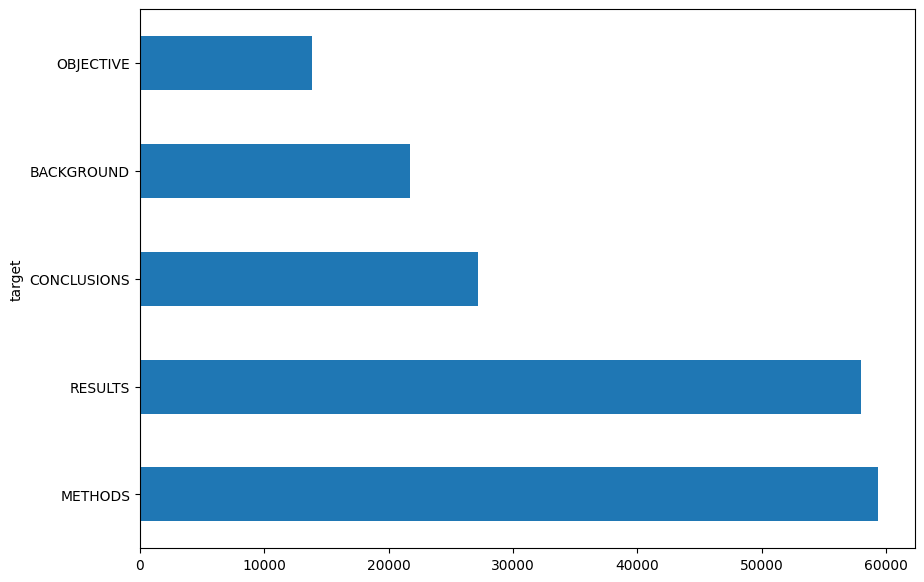

In [ ]:
train_df['target'].value_counts().plot(kind='barh',figsize=(10,7))


In [ ]:
### Now we are going to convert our text column into list because models prefer list more than pandas series
train_sentences=train_df['text'].to_list()
test_sentences=test_df['text'].to_list()
val_sentences=val_df['text'].to_list()

In [ ]:
train_sentences[:14] # Looks like the work is done here

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

### Now we are going to label encode and one hot encode out target column

In [ ]:
# One hot encoding the targets this function takes array like input that to 2d not 1d for going from 1d to 2d you have to do .reshape(-1,1)
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
train_ohe_target=ohe.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
test_ohe_target=ohe.transform(test_df['target'].to_numpy().reshape(-1,1))
val_ohe_target=ohe.transform(val_df['target'].to_numpy().reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
train_ohe_target,test_ohe_target,val_ohe_target

(array([[0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.]]),
 array([[1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.]]),
 array([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.]]))

In [ ]:
# label encoding the targets
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le_train_target=le.fit_transform(train_df['target'])
le_test_target=le.transform(test_df['target'])
le_val_target=le.transform(val_df['target'])

In [ ]:
le_train_target,le_test_target,le_val_target

(array([3, 2, 2, ..., 4, 1, 1]),
 array([0, 4, 4, ..., 4, 4, 1]),
 array([0, 0, 3, ..., 4, 1, 1]))

In [ ]:
# You can even get name of the classes from Label encoder
le.classes_

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

## Curriculum Of This Project

| Experiment | Model |
|------------|-------|
| 0          | Naive Bayes with TF-IDF encoder (baseline) |
| 1          | Conv1D with token embeddings |
| 2          | TensorFlow Hub Pretrained Feature Extractor |
| 3          | Conv1D with character embeddings |
| 4          | Pretrained token embeddings + character embeddings |
| 5          | Pretrained token embeddings + character embeddings + positional embeddings |

### Creating a baseline for our model
* it is going to be based on Naive bayes Multinomial and text vectorization will be done using tfidf vectorizer

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
from sklearn.pipeline import Pipeline #You can also build a pipeline to make vectorization built in 'fit/score' and other methods

In [ ]:
pipeline=Pipeline([('vectorizer',TfidfVectorizer()),
                  ('classifier',MultinomialNB())])

In [ ]:
#performing various operations with pipeline
pipeline.fit(train_sentences,le_train_target)
pipeline.score(val_sentences,le_val_target)

0.7218323844829869

In [ ]:
# Vectorization of text
tfidf=TfidfVectorizer()
x_train=tfidf.fit_transform(train_sentences)
x_test=tfidf.transform(test_sentences)
x_val=tfidf.transform(val_sentences)

In [ ]:
#Building and fitting the model
baseline=MultinomialNB()
baseline.fit(x_train,le_train_target)
baseline.score(x_train,le_train_target) # Training Accuracy

0.7516829593423684

In [ ]:
baseline.score(x_test,le_test_target) # Testing accuracy

0.716674962667994

In [ ]:
baseline.score(x_val,le_val_target)

0.7218323844829869

In [ ]:
baseline_preds=baseline.predict(x_test)
baseline_preds

array([2, 2, 2, ..., 4, 4, 4])

In [ ]:
baseline_preds[:10],le_test_target[:10]

(array([2, 2, 2, 4, 4, 4, 4, 1, 4, 0]), array([0, 4, 4, 4, 4, 4, 4, 1, 1, 0]))

In [ ]:
def evaluation_metrics(y_true,y_pred):
  precision,recall,fscore,support=precision_recall_fscore_support(y_true,y_pred,average='weighted')
  score=accuracy_score(y_true,y_pred)
  results={'Score':score,
           'precision':precision,
           'recall':recall,
           'F1_score':fscore}
  return results


In [ ]:
baseline_results=evaluation_metrics(le_test_target,baseline_preds)
baseline_results

{'Score': 0.716674962667994,
 'precision': 0.7124322482375202,
 'recall': 0.716674962667994,
 'F1_score': 0.6925101703856846}

### Next in the curriculum is a token embedding Conv1D model

In [ ]:
# Getting the average length of the sentences in abstract
round(sum((len(i.split())) for i in train_sentences)/len(train_sentences)) #This here is a list comprehension


26

In [ ]:
len_of_sentences=[]
for i in train_sentences:
  len_of_sentences.append(len(i.split()))

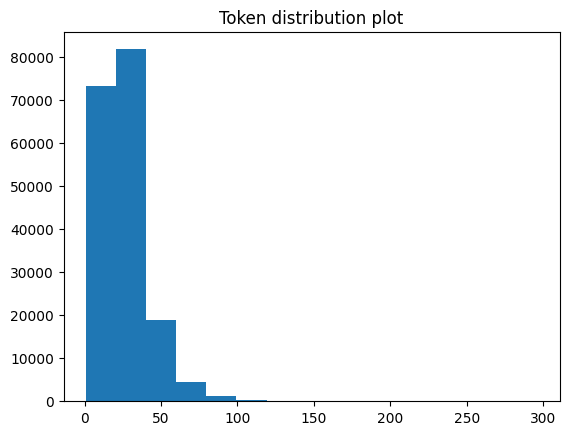

In [ ]:
# Distribution plot for tokens
import matplotlib.pyplot as plt
plt.hist(len_of_sentences,bins=15)
plt.title('Token distribution plot');

In [ ]:
# This will give us an idea about what length of the tokens cover 95% of the training data
import numpy as np
np.percentile(len_of_sentences,95)

55.0

In [ ]:
# How many words are there in our vocab of pubmed 20k (according to the paper there are 68000 words)
max_tokens=68000

In [ ]:
# Creating a text vectorization layer for tokenization
import tensorflow as tf
text_vectorization=tf.keras.layers.TextVectorization(output_sequence_length=55,max_tokens=68000)

In [ ]:
#Adapting this layer to our training data
text_vectorization.adapt(train_sentences)

In [ ]:
#Testing out vectorization layer
import random
r_sentence=random.choice(train_sentences)
print(f'sentence: {r_sentence} \nvectorized sentence: {text_vectorization(r_sentence)}')

sentence: of the @ swab samples collected , @ did not produce any growth . 
vectorized sentence: [    4     2 12933   513   444   112    31  2588   262   621     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0]


In [ ]:
#Getting the unique tokens in the vocabulary
vocab=text_vectorization.get_vocabulary()
print(f'total words in vocab {len(vocab)} \n5 most common words {vocab[:5]} \n5 least common words {vocab[-5:]}')

total words in vocab 64841 
5 most common words ['', '[UNK]', 'the', 'and', 'of'] 
5 least common words ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [ ]:
# You can even get a configuration of vectorization layer
text_vectorization.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

In [ ]:
# Now creating an embedding layer
embedding=tf.keras.layers.Embedding(output_dim=128,input_dim=68000,input_length=55,mask_zero=True)
#Mask_zero=True, Masks all the zeroes in out tensor helpful for more faster and efficient computing

In [ ]:
# Let's test out our embedding layer
print(f'sentence: {r_sentence} \nvectorized sentence: {text_vectorization(r_sentence)} \embedded sentence: {embedding(text_vectorization(r_sentence))}')
print(f'shape of the embedding: {embedding(text_vectorization(r_sentence)).shape}')

sentence: of the @ swab samples collected , @ did not produce any growth . 
vectorized sentence: [    4     2 12933   513   444   112    31  2588   262   621     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0] \embedded sentence: [[-0.03457535  0.01672346  0.02558393 ... -0.01446424  0.01174359
   0.02110854]
 [-0.04389768 -0.02610483  0.04529617 ... -0.02899791 -0.03150898
  -0.00174831]
 [ 0.04498811  0.02569071  0.01751905 ...  0.01932431 -0.0289245
  -0.02266098]
 ...
 [ 0.01531377  0.04147917 -0.04700607 ...  0.02535487  0.04353181
  -0.02106509]
 [ 0.01531377  0.04147917 -0.04700607 ...  0.02535487  0.04353181
  -0.02106509]
 [ 0.01531377  0.04147917 -0.04700607 ...  0.02535487  0.04353181
  -0.02106509]]
shape of the embedding: (55, 128)


### Preparing our dataset for it's faster computing , following tf.data api guidelines for it , read the guidelines it's must for every ml model you will create in future

* https://www.tensorflow.org/guide/data
* https://www.tensorflow.org/guide/data_performance

In [ ]:
train_dataset=tf.data.Dataset.from_tensor_slices((train_sentences,train_ohe_target))
test_dataset=tf.data.Dataset.from_tensor_slices((test_sentences,test_ohe_target))
val_dataset=tf.data.Dataset.from_tensor_slices((val_sentences,val_ohe_target))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
# Batching our dataset , prefetching our dataset
train_dataset=train_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # we are not shuffling our data beacuse order matters to us
test_dataset=test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)   #buffer size in prefetch() to AUTOTUNE means system is automatically going to tune bffering i.e
val_dataset=val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)     # it will say automatically prefetch as many samples as you can

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
# Now building a convolution model on functional api
#input layer
inputs=tf.keras.layers.Input(shape=(1,),dtype='string')

#text vectorization layer
x=text_vectorization(inputs)

#embedding layer
x=embedding(x)

#convolutional layer
x=tf.keras.layers.Conv1D(filters=64,kernel_size=3,activation='relu',padding='valid')(x)

#GlobalMaxPooling1D layer
x=tf.keras.layers.GlobalMaxPooling1D()(x)

#output Dense layer
outputs=tf.keras.layers.Dense(5,activation='softmax')(x)

#combining inputs and outputs
conv_model=tf.keras.Model(inputs,outputs)

#summary of the model
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 55)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 55, 128)           8704000   
                                                                 
 conv1d (Conv1D)             (None, 53, 64)            24640     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 5)                 325   

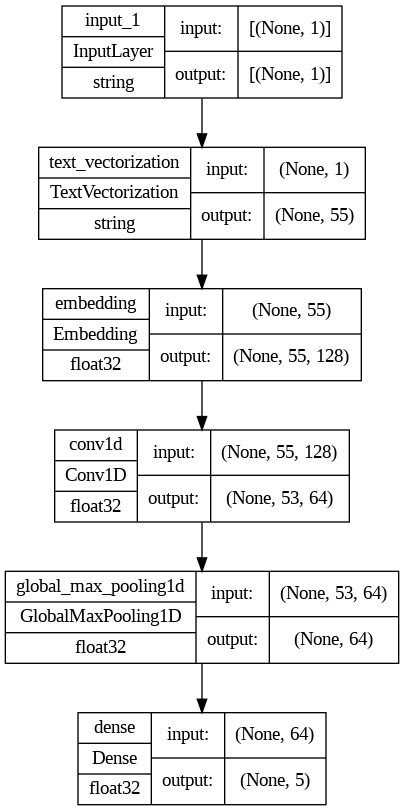

In [ ]:
# plotting the model
tf.keras.utils.plot_model(conv_model,show_shapes=True,show_dtype=True)

In [ ]:
# compiling the model
conv_model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics='accuracy')

In [ ]:
# Creating an earlystopping call back for our model to avoid overfitting
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',restore_best_weights=True,patience=0,verbose=1)

In [ ]:
#Fitting the model
conv_model_history=conv_model.fit(train_dataset,steps_per_epoch=len(train_dataset),
                                  validation_data=val_dataset,validation_steps=(0.15*len(val_dataset)),
                                  callbacks=callback,
                                  epochs=5,verbose=1)

Epoch 1/5
5627/5627 [==============================] - 60s 10ms/step - loss: 0.5605 - accuracy: 0.7937 - val_loss: 0.4782 - val_accuracy: 0.8180
Epoch 2/5
5627/5627 [==============================] - 38s 7ms/step - loss: 0.3791 - accuracy: 0.8649 - val_loss: 0.5008 - val_accuracy: 0.8149
Epoch 2: early stopping


In [ ]:
conv_model.evaluate(test_dataset),conv_model.evaluate(val_dataset)

945/945 [==============================] - 4s 4ms/step - loss: 0.4910 - accuracy: 0.8204


([0.5060164928436279, 0.8140700459480286],
 [0.4909757077693939, 0.8204355835914612])

<Axes: >

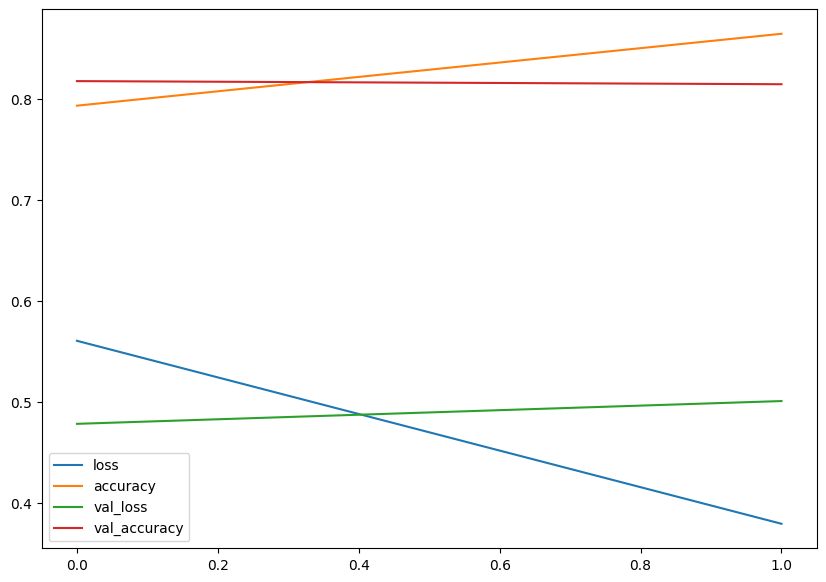

In [ ]:
# Plotting the loss curve of the model
pd.DataFrame(conv_model_history.history).plot(figsize=(10,7))

In [ ]:
# predicting on conv model
conv_preds=conv_model.predict(val_dataset)
import numpy as np
conv_preds=np.argmax(conv_preds,axis=1)
conv_preds[:10]

945/945 [==============================] - 2s 2ms/step


array([0, 0, 3, 2, 2, 4, 4, 2, 4, 1])

In [ ]:
conv_model_results=evaluation_metrics(le_val_target,conv_preds)
conv_model_results

{'Score': 0.8204355885078777,
 'precision': 0.821195577951813,
 'recall': 0.8204355885078777,
 'F1_score': 0.8177534771125148}

### Now we are going to use Transfer learning using `USE(Universal sentence encoder)`

In [ ]:
import tensorflow_hub as hub

In [ ]:
# Downloading and loading USE model from tensorflow hub
use_layer=hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',trainable=False,input_shape=[],dtype='string')

In [ ]:
# Testing out our keras layer of USE
r_sen=random.choice(train_sentences)
print(f'sentence before embedding {r_sen}')
print(f'sentence after embedding {use_layer([r_sen])}')
print(f'len of sentence after embedding {len(use_layer([r_sen]))}')

sentence before embedding warfarin was found to be more efficacious than aspirin for an anticoagulation therapy of older chinese patients with af and stable coronary heart disease .
sentence after embedding [[-5.07781692e-02  3.31517793e-02 -2.27459092e-02 -2.88642403e-02
  -7.09286034e-02 -6.27012774e-02  7.03917518e-02 -5.85281365e-02
   4.46313396e-02 -1.57065839e-02  9.07378718e-02 -5.29326014e-02
  -3.20536718e-02 -1.07015520e-02  4.69916575e-02  5.82916941e-03
  -9.11281109e-02 -5.76818809e-02 -4.30296641e-03  4.44788076e-02
  -4.00506426e-04  4.78638001e-02  6.21265434e-02 -4.05728184e-02
   2.90425010e-02  1.61387883e-02  2.64898483e-02  1.64560229e-02
   9.11430921e-03  3.21904421e-02 -1.68813802e-02  9.11278799e-02
   1.19797811e-02  6.99457526e-02 -1.41457608e-02 -4.26084436e-02
  -3.51250842e-02 -2.93959789e-02 -5.85935079e-02 -7.01235756e-02
   4.53323545e-03  5.49903251e-02 -2.13249922e-02 -2.70532649e-02
   2.01910101e-02  1.04733778e-03  2.05640402e-02  5.08776046e-02
 

In [ ]:
# Creating a functional api model  #USE model comes with built in text_vectorizer so no need for it here
#input layer
inputs=tf.keras.layers.Input(shape=[],dtype='string')

#feature extraction layer
x=use_layer(inputs)

# Dense layer
x=tf.keras.layers.Dense(32,activation='relu')(x)

#output layer
outputs=tf.keras.layers.Dense(5,activation='softmax')(x)

#combining inputs and outputs
fe_model=tf.keras.Model(inputs,outputs)

#summary of the model
fe_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_1 (Dense)             (None, 32)                16416     
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 256814405 (979.67 MB)
Trainable params: 16581 (64.77 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


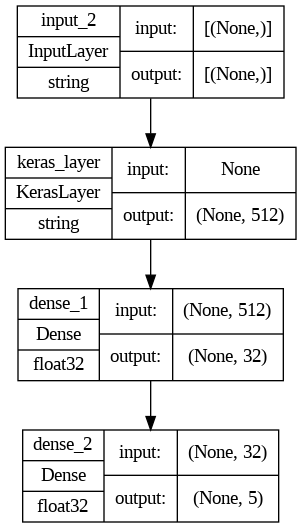

In [ ]:
#plotting the model
tf.keras.utils.plot_model(fe_model,show_shapes=True,show_dtype=True)

In [ ]:
# compiling the model
fe_model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics='accuracy')

In [ ]:
# early stopping callback for fe_model
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3,restore_best_weights=True)
lr_reducer=tf.keras.callbacks.ReduceLROnPlateau(factor=0.2,varbose=1,patience=1)

In [ ]:
# Fitting the model
fe_model_history=fe_model.fit(train_dataset,steps_per_epoch=(len(train_dataset)),
                              validation_data=val_dataset,validation_steps=(0.15*len(val_dataset)),
                              epochs=5,verbose=1,callbacks=[early_stopping,lr_reducer])

Epoch 1/5
5627/5627 [==============================] - 78s 13ms/step - loss: 0.7768 - accuracy: 0.7016 - val_loss: 0.6994 - val_accuracy: 0.7300 - lr: 0.0010
Epoch 2/5
5627/5627 [==============================] - 75s 13ms/step - loss: 0.6887 - accuracy: 0.7375 - val_loss: 0.6571 - val_accuracy: 0.7474 - lr: 0.0010
Epoch 3/5
5627/5627 [==============================] - 74s 13ms/step - loss: 0.6581 - accuracy: 0.7497 - val_loss: 0.6407 - val_accuracy: 0.7559 - lr: 0.0010
Epoch 4/5
5627/5627 [==============================] - 75s 13ms/step - loss: 0.6415 - accuracy: 0.7564 - val_loss: 0.6331 - val_accuracy: 0.7568 - lr: 0.0010
Epoch 5/5
5627/5627 [==============================] - 71s 13ms/step - loss: 0.6304 - accuracy: 0.7606 - val_loss: 0.6288 - val_accuracy: 0.7592 - lr: 0.0010


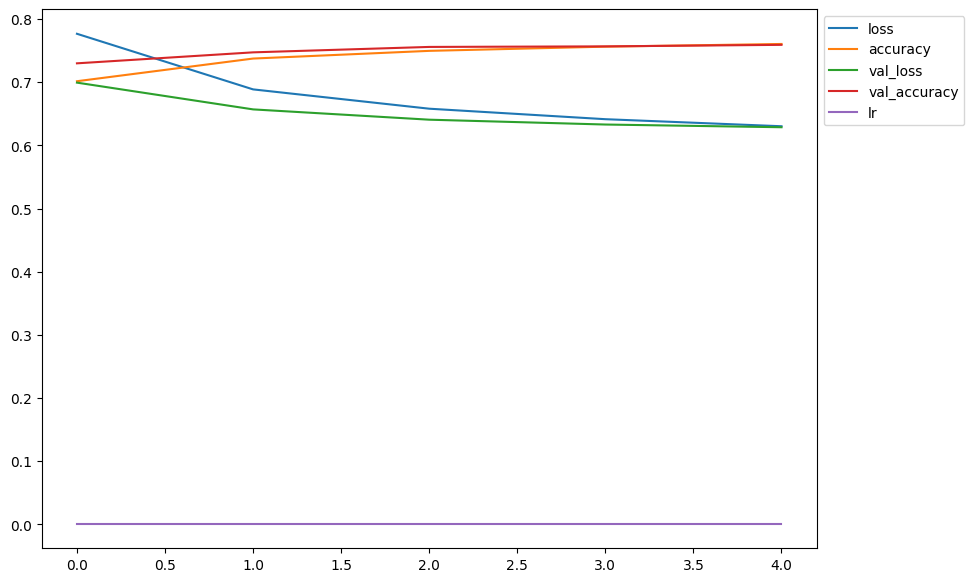

In [ ]:
#plotting the loss curve of the fe_model
pd.DataFrame(fe_model_history.history).plot(figsize=(10,7)).legend(bbox_to_anchor=(1,1))

In [ ]:
#evaluating the model
fe_model.evaluate(val_dataset)

945/945 [==============================] - 10s 11ms/step - loss: 0.6349 - accuracy: 0.7587


[0.6349104642868042, 0.7587051391601562]

In [ ]:
#making predictions with the model
fe_preds=fe_model.predict(val_dataset)
fe_preds[:10]

945/945 [==============================] - 9s 9ms/step


array([[4.47392225e-01, 3.52734625e-01, 4.27817751e-04, 1.91653177e-01,
        7.79221067e-03],
       [4.30105567e-01, 4.46886331e-01, 8.51073361e-04, 1.20636582e-01,
        1.52037875e-03],
       [4.67227489e-01, 1.40795605e-02, 2.17643306e-02, 4.80462700e-01,
        1.64657757e-02],
       [2.59973807e-03, 2.41957996e-02, 8.93804967e-01, 3.25568253e-03,
        7.61438385e-02],
       [5.93555858e-03, 2.37679817e-02, 7.36581862e-01, 1.96749135e-03,
        2.31747106e-01],
       [3.68778594e-04, 2.17797802e-04, 2.65166342e-01, 6.74687981e-05,
        7.34179616e-01],
       [8.26687145e-04, 4.03588288e-04, 6.55888319e-01, 7.46554346e-04,
        3.42134833e-01],
       [6.38891011e-04, 1.52333605e-03, 7.22338736e-01, 1.09535002e-04,
        2.75389493e-01],
       [5.80329273e-04, 2.48692464e-03, 5.06882835e-03, 4.21675883e-04,
        9.91442263e-01],
       [5.86388148e-02, 7.67461002e-01, 8.84723105e-03, 1.15611106e-02,
        1.53491914e-01]], dtype=float32)

In [ ]:
fe_preds=np.argmax(fe_preds,axis=1)

In [ ]:
fe_model_results=evaluation_metrics(le_val_target,fe_preds)
fe_model_results

{'Score': 0.7587051502714154,
 'precision': 0.7551402726497312,
 'recall': 0.7587051502714154,
 'F1_score': 0.7543678254170978}

### Now we are upto model 3 which is a Conv1D model with character level embeddings (According to the curriculum above)

Token level vs Character level embedding
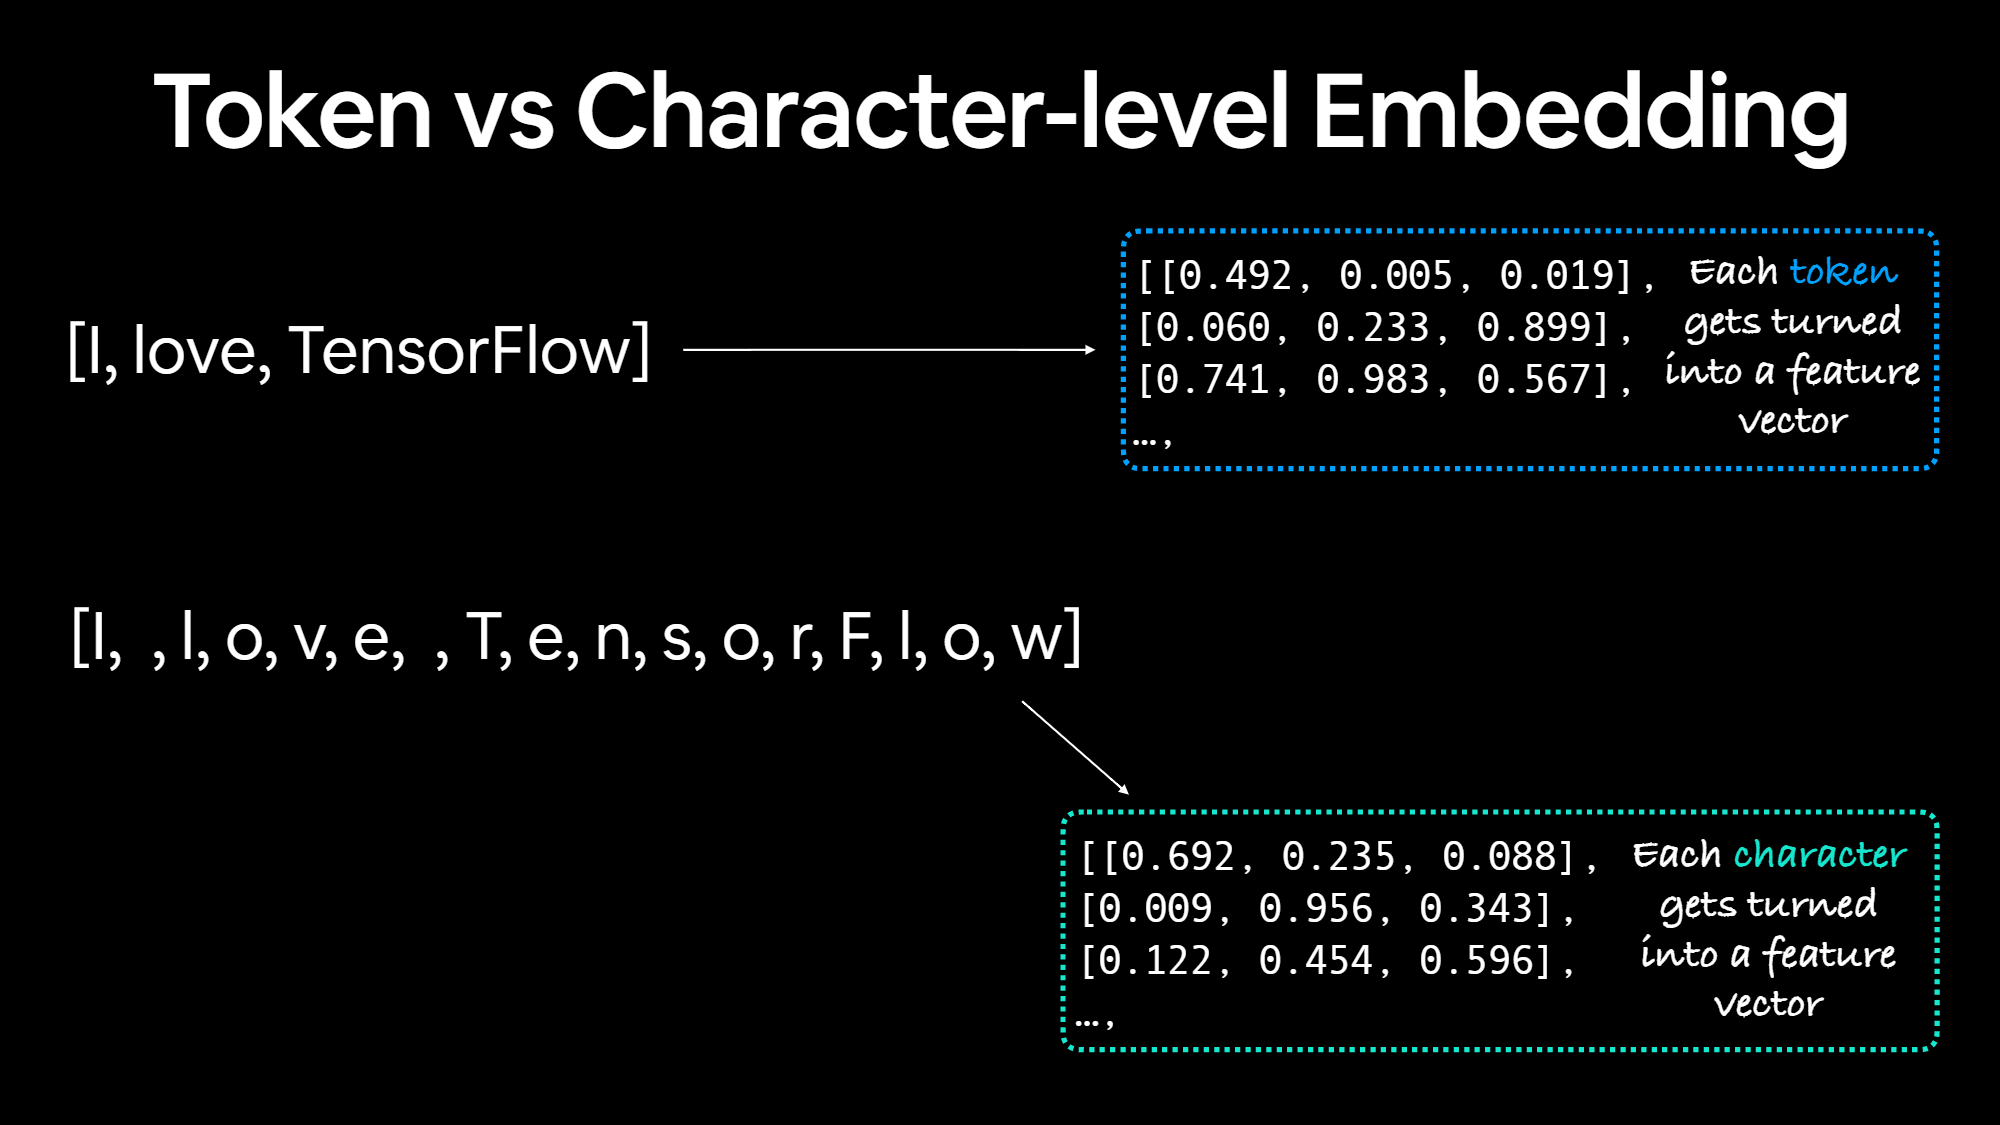

In [ ]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [ ]:
' '.join(r_sen)

'w a r f a r i n   w a s   f o u n d   t o   b e   m o r e   e f f i c a c i o u s   t h a n   a s p i r i n   f o r   a n   a n t i c o a g u l a t i o n   t h e r a p y   o f   o l d e r   c h i n e s e   p a t i e n t s   w i t h   a f   a n d   s t a b l e   c o r o n a r y   h e a r t   d i s e a s e   .'

In [ ]:
# This will create space in sentences
char_train_sentences=[ ' '.join(sentence) for sentence in train_sentences]
char_test_sentences=[ ' '.join(sentence) for sentence in test_sentences]
char_val_sentences=[ ' '.join(sentence) for sentence in val_sentences]
char_train_sentences[:10]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [ ]:
#average length of chars in train sentences
avg_length=[len(i) for i in char_train_sentences]
avg_length_mean=np.mean(avg_length)
avg_length_mean

297.7325149966674

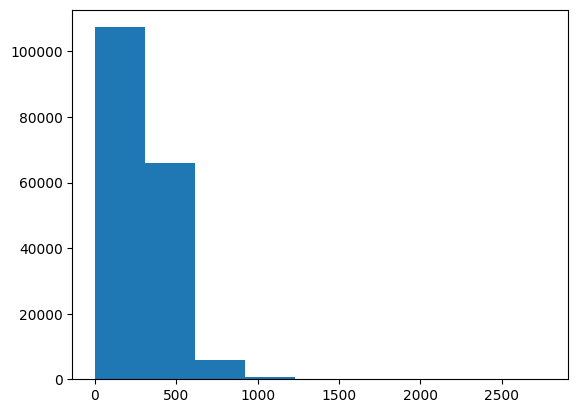

In [ ]:
# PLotting the length distriustion
plt.hist(avg_length,bins=9);

In [ ]:
# 95 percentile of the length
np.percentile(avg_length,95)

579.0

In [ ]:
# Creating char_vectroizer just like we made text vectorizer
char_vectorizer=tf.keras.layers.TextVectorization(max_tokens=30,output_sequence_length=579)

In [ ]:
char_vectorizer.adapt(char_train_sentences)

In [ ]:
# Testing out char vectorizer
r_sen=random.choice(char_train_sentences)
print(r_sen)
char_vectorizer([r_sen])

m e a n   b a s e l i n e   s e r u m   @   (   o h   )   d   w a s   @   n m o l / l   a n d   @   n m o l / l   i n   t h e   v i t a m i n   d   a n d   p l a c e b o   g r o u p s   ,   r e s p e c t i v e l y   ,   a n d   i n c r e a s e d   b y   @   n m o l / l   a n d   @   n m o l / l   ,   r e s p e c t i v e l y   .


<tf.Tensor: shape=(1, 579), dtype=int64, numpy=
array([[15,  2,  5,  6, 22,  5,  9,  2, 12,  4,  6,  2,  9,  2,  8, 16,
        15,  7, 13, 10, 20,  5,  9,  6, 15,  7, 12, 12,  5,  6, 10,  6,
        15,  7, 12, 12,  4,  6,  3, 13,  2, 21,  4,  3,  5, 15,  4,  6,
        10,  5,  6, 10, 14, 12,  5, 11,  2, 22,  7, 18,  8,  7, 16, 14,
         9,  8,  2,  9, 14,  2, 11,  3,  4, 21,  2, 12, 19,  5,  6, 10,
         4,  6, 11,  8,  2,  5,  9,  2, 10, 22, 19,  6, 15,  7, 12, 12,
         5,  6, 10,  6, 15,  7, 12, 12,  8,  2,  9, 14,  2, 11,  3,  4,
        21,  2, 12, 19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0, 

In [ ]:
# Length of vocabulary in char vectorizer
len(char_vectorizer.get_vocabulary()),print(f'5 most coomin characters {char_vectorizer.get_vocabulary()[:5]}')

5 most coomin characters ['', '[UNK]', 'e', 't', 'i']


(28, None)

In [ ]:
# creating an embedding layer on character level
char_embedding_layers=tf.keras.layers.Embedding(input_dim=28,input_length=579,output_dim=128,mask_zero=False)

In [ ]:
#testing out embedding layer
char_embedding_layers(char_vectorizer([r_sen]))

<tf.Tensor: shape=(1, 579, 128), dtype=float32, numpy=
array([[[ 0.01660762,  0.00577401, -0.04518786, ..., -0.03711231,
         -0.04413248, -0.04591351],
        [ 0.0011971 ,  0.04849475,  0.03018954, ..., -0.04996926,
          0.01741428, -0.02851656],
        [ 0.03113642,  0.02368713, -0.00028618, ..., -0.04288787,
         -0.02854534,  0.00863462],
        ...,
        [-0.03508719, -0.02482215, -0.00874836, ..., -0.00527374,
         -0.03586258,  0.00640268],
        [-0.03508719, -0.02482215, -0.00874836, ..., -0.00527374,
         -0.03586258,  0.00640268],
        [-0.03508719, -0.02482215, -0.00874836, ..., -0.00527374,
         -0.03586258,  0.00640268]]], dtype=float32)>

In [ ]:
# Getting our sentences in the form of datasets plus prefetching and batching of data
train_char_dataset=tf.data.Dataset.from_tensor_slices((char_train_sentences,train_ohe_target)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset=tf.data.Dataset.from_tensor_slices((char_val_sentences,val_ohe_target)).batch(32).prefetch(tf.data.AUTOTUNE)
train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
# Creating a functional api model based on Conv1D layer
#input layer
inputs= tf.keras.layers.Input(shape=(1,),dtype='string')

#char vectorizer layer
x=char_vectorizer(inputs)

# embedding layer on character level
x=char_embedding_layers(x)

#conv1d layer
x=tf.keras.layers.Conv1D(filters=64,kernel_size=5,padding='valid',activation='relu')(x)

#Global Max Pooling layer
x=tf.keras.layers.GlobalMaxPooling1D()(x)

#Dense output layer
outputs=tf.keras.layers.Dense(5,activation='softmax')(x)

#combining inputs and outputs
conv1d_model_char=tf.keras.Model(inputs,outputs)

# model's summary
conv1d_model_char.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 579)               0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 579, 128)          3584      
                                                                 
 conv1d_1 (Conv1D)           (None, 575, 64)           41024     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_3 (Dense)             (None, 5)                 325 

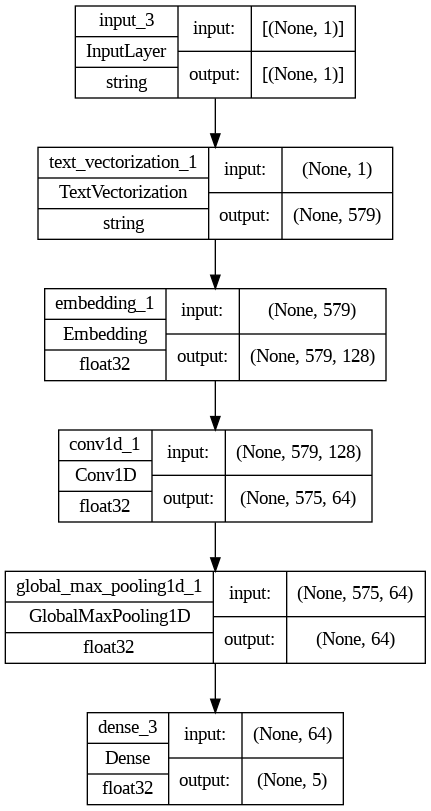

In [ ]:
# plotting the model
tf.keras.utils.plot_model(conv1d_model_char,show_shapes=True,show_dtype=True)

In [ ]:
# compiling the model
conv1d_model_char.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics='accuracy')

In [ ]:
# Fitting the model
conv1d_model_char_history=conv1d_model_char.fit(train_char_dataset,steps_per_epoch=len(train_char_dataset),
                                                validation_data=val_char_dataset,validation_steps=(0.15*len(val_char_dataset)),
                                                epochs=5,verbose=1,callbacks=[early_stopping,lr_reducer])

Epoch 1/5
5627/5627 [==============================] - 42s 7ms/step - loss: 0.8479 - accuracy: 0.6692 - val_loss: 0.7654 - val_accuracy: 0.7044 - lr: 0.0010
Epoch 2/5
5627/5627 [==============================] - 37s 7ms/step - loss: 0.7374 - accuracy: 0.7166 - val_loss: 0.7298 - val_accuracy: 0.7223 - lr: 0.0010
Epoch 3/5
5627/5627 [==============================] - 37s 7ms/step - loss: 0.7127 - accuracy: 0.7280 - val_loss: 0.7137 - val_accuracy: 0.7278 - lr: 0.0010
Epoch 4/5
5627/5627 [==============================] - 37s 7ms/step - loss: 0.6990 - accuracy: 0.7346 - val_loss: 0.7123 - val_accuracy: 0.7311 - lr: 0.0010
Epoch 5/5
5627/5627 [==============================] - 36s 6ms/step - loss: 0.6890 - accuracy: 0.7383 - val_loss: 0.7154 - val_accuracy: 0.7309 - lr: 0.0010


<Axes: >

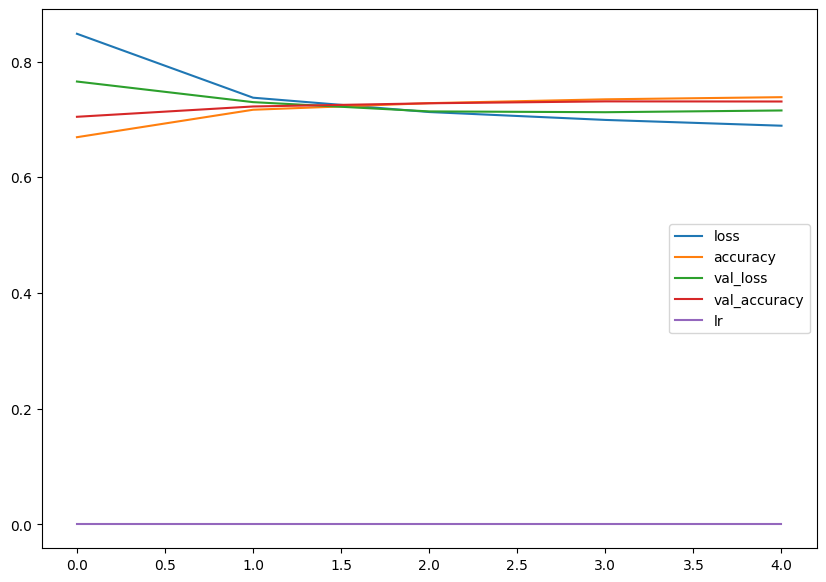

In [ ]:
# plotting the loss curve of the model
pd.DataFrame(conv1d_model_char_history.history).plot(figsize=(10,7))

In [ ]:
# evaluating the model
conv1d_model_char.evaluate(val_char_dataset)

945/945 [==============================] - 5s 6ms/step - loss: 0.7276 - accuracy: 0.7254


[0.7275927066802979, 0.7254071235656738]

In [ ]:
# predicting on model
conv1d_char_preds=conv1d_model_char.predict(val_char_dataset)
conv1d_char_preds=np.argmax(conv1d_char_preds,axis=1)
conv1d_char_preds[:10]

945/945 [==============================] - 3s 3ms/step


array([1, 0, 3, 2, 4, 4, 4, 4, 4, 4])

In [ ]:
# Evaluation metrics
conv1d_model_char_results=evaluation_metrics(le_val_target,conv1d_char_preds)
conv1d_model_char_results

{'Score': 0.7254071229974844,
 'precision': 0.7241517615717777,
 'recall': 0.7254071229974844,
 'F1_score': 0.7135149635962826}

### Next in the curriculum is a hybrid model combination of pre trained token embeddings( same as 2) + character embeddings (same as 3)

In [ ]:
# Pretrained token embeddings model
#input layer
inputs=tf.keras.layers.Input(shape=[],dtype='string')
#pretrained use (universal sentence encoder layer)
token_embeds=use_layer(inputs)
#Dense layer
x=tf.keras.layers.Dense(62,activation='relu')(token_embeds)
#output layer
outputs=tf.keras.layers.Dense(128,activation='softmax')(x)
#token embedding model ( combining inputs and outputs)
tke_model=tf.keras.Model(inputs,outputs)


# Char_embedding model
#input layer
char_input=tf.keras.layers.Input(shape=(1,),dtype='string')
# char_vectorizer
x=char_vectorizer(char_input)
# char embedding
x=char_embedding_layers(x)
#bidirectional lstm layer
char_output=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(x)
#char model
char_model=tf.keras.Model(char_input,char_output)

# conactenating both the models
concat=tf.keras.layers.Concatenate()([tke_model.output,char_model.output])
#Drop out layer here according to the paper
drop=tf.keras.layers.Dropout(0.5)(concat)
#Dense layer
x=tf.keras.layers.Dense(128,activation='relu')(drop)
#Final drop out layer
f_drop=tf.keras.layers.Dropout(0.5)(x)
#Out put layer
final_output=tf.keras.layers.Dense(5,activation='softmax')(f_drop)


#Now combining the inputs(char and token) and outputs(final output) to create the complete model
hybrid_model=tf.keras.Model(inputs=[tke_model.input,char_model.input],outputs=final_output)

#checking the summary of the model
hybrid_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None,)]                    0         []                            
                                                                                                  
 input_5 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 keras_layer (KerasLayer)    (None, 512)                  2567978   ['input_4[0][0]']             
                                                          24                                      
                                                                                                  
 text_vectorization_1 (Text  (None, 579)                  0         ['input_5[0][0]']       

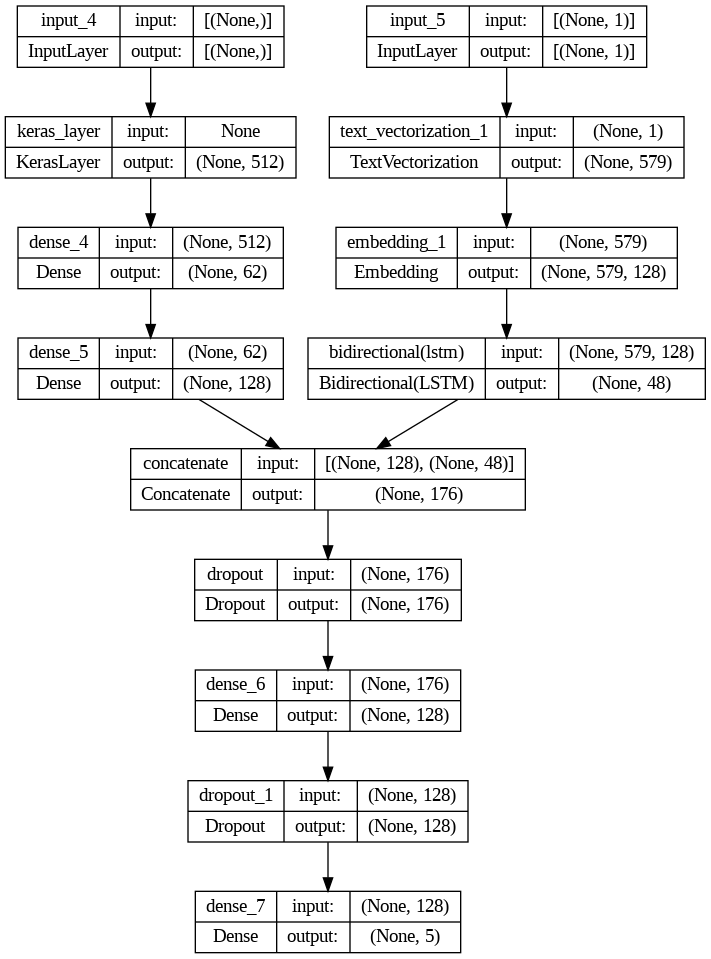

In [ ]:
#Plotting the hybrid model
tf.keras.utils.plot_model(hybrid_model,show_shapes=True)

In [ ]:
#Compiling our model
hybrid_model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics='accuracy')

In [ ]:
# Creating performant datasets suitable for our hybrid model
train_dataset_hybrid_sentences=tf.data.Dataset.from_tensor_slices((train_sentences,char_train_sentences)) #according to the input sequence set by us in hybrid_model's multi input
train_dataset_hybrid_labels=tf.data.Dataset.from_tensor_slices(train_ohe_target) #Labels for both are same

#combining multi input with labels
train_dataset_hybrid=tf.data.Dataset.zip((train_dataset_hybrid_sentences,train_dataset_hybrid_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset_hybrid

<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
# same step for validation dataset
val_datset_hybrid_sentences=tf.data.Dataset.from_tensor_slices((val_sentences,char_val_sentences))
val_dataset_hybrid_label=tf.data.Dataset.from_tensor_slices(val_ohe_target)

#combining multi input with labels
val_dataset_hybrid=tf.data.Dataset.zip((val_datset_hybrid_sentences,val_dataset_hybrid_label)).batch(32).prefetch(tf.data.AUTOTUNE)

val_dataset_hybrid

<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
#Fitting the hybrid model
hybrid_model_history=hybrid_model.fit(train_dataset_hybrid,steps_per_epoch=(0.15*len(train_dataset_hybrid)),
                                      validation_data=val_dataset_hybrid,validation_steps=(0.15*len(val_dataset_hybrid)),
                                      epochs=5,verbose=1,callbacks=early_stopping)

Epoch 1/5
844/844 [==============================] - 55s 57ms/step - loss: 1.0852 - accuracy: 0.5564 - val_loss: 0.8144 - val_accuracy: 0.6816
Epoch 2/5
844/844 [==============================] - 47s 56ms/step - loss: 0.8570 - accuracy: 0.6697 - val_loss: 0.7565 - val_accuracy: 0.7014
Epoch 3/5
844/844 [==============================] - 45s 53ms/step - loss: 0.8129 - accuracy: 0.6880 - val_loss: 0.7357 - val_accuracy: 0.7128
Epoch 4/5
844/844 [==============================] - 48s 56ms/step - loss: 0.8073 - accuracy: 0.6884 - val_loss: 0.7091 - val_accuracy: 0.7214
Epoch 5/5
844/844 [==============================] - 45s 54ms/step - loss: 0.7635 - accuracy: 0.7065 - val_loss: 0.7153 - val_accuracy: 0.7216


In [ ]:
hybrid_model.evaluate(val_dataset_hybrid)

945/945 [==============================] - 26s 27ms/step - loss: 0.7234 - accuracy: 0.7214


[0.7233889698982239, 0.7214351892471313]

In [ ]:
hybrid_model_preds=hybrid_model.predict(val_dataset_hybrid)
hybrid_model_preds=np.argmax(hybrid_model_preds,axis=1)
hybrid_model_preds[:5]

945/945 [==============================] - 26s 26ms/step


array([1, 0, 0, 2, 2])

In [ ]:
# Hybrid model results
hybrid_model_results=evaluation_metrics(le_val_target,hybrid_model_preds)
hybrid_model_results

{'Score': 0.7214351913147093,
 'precision': 0.7324193326840258,
 'recall': 0.7214351913147093,
 'F1_score': 0.716793507670869}

### Next in the curriculum is tribrid model with added positional embedding above hybrid model

In [ ]:
# we are going back to our dataframe
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [ ]:
train_df['line_number'].value_counts()

line_number
0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

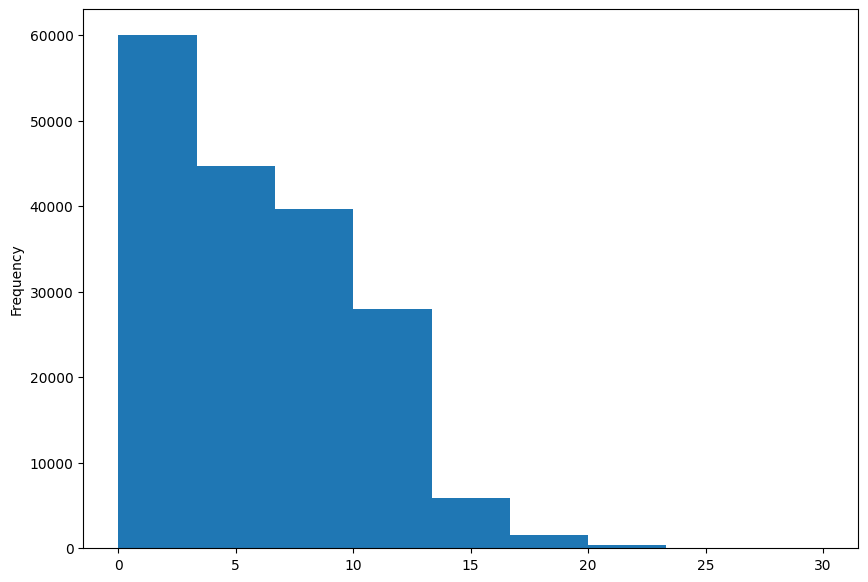

In [ ]:
# Checking the distribution of the line number column
train_df['line_number'].plot(kind='hist',figsize=(10,7),bins=9)

In [ ]:
# As you can see 15 no of lines cover over 98% of training data
np.percentile(train_df['line_number'],98)

15.0

In [ ]:
# we are going to use pure tensorflow for one hot encoding this time
train_line_number_one_hot=tf.one_hot(train_df['line_number'],depth=15)
val_line_number_one_hot=tf.one_hot(val_df['line_number'],depth=15)
test_line_number_one_hot=tf.one_hot(test_df['line_number'],depth=15)

In [ ]:
train_line_number_one_hot[:10]

<tf.Tensor: shape=(10, 15), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [ ]:
# Going to do the same for the total lines column
train_df['total_lines'].value_counts()

total_lines
11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

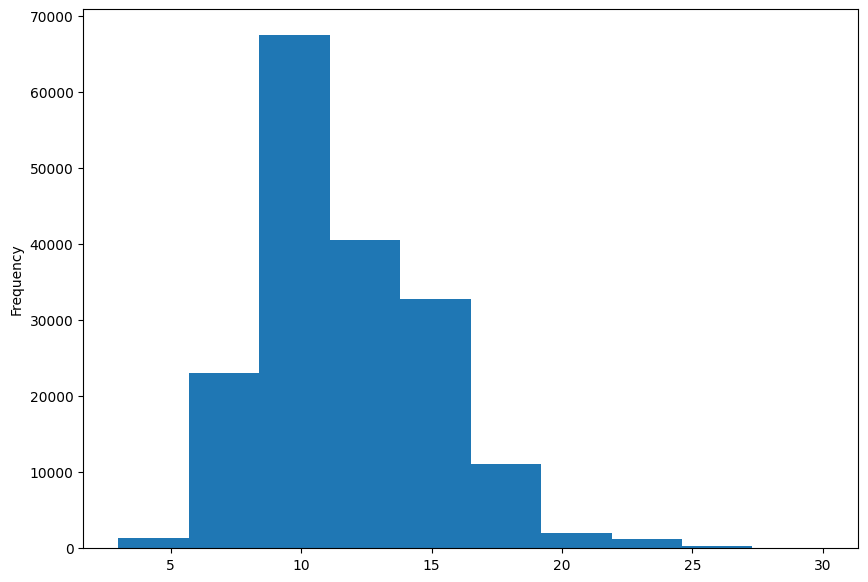

In [ ]:
# Checking the histogram distribution of the total lines column
train_df['total_lines'].plot(kind='hist',figsize=(10,7))

In [ ]:
#Let's check the range where 98% of the total lines data resides so 20 is going to be a good value
np.percentile(train_df['total_lines'],98)

20.0

In [ ]:
train_total_lines_one_hot=tf.one_hot(train_df['total_lines'],depth=20)
val_total_line_one_hot=tf.one_hot(val_df['total_lines'],depth=20)
test_total_line_one_hot=tf.one_hot(test_df['total_lines'],depth=20)

In [ ]:
train_total_lines_one_hot[20:30]

<tf.Tensor: shape=(10, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
     

In [ ]:
#Creating model using functional api
#Model for token level embedding
tkn_inputs=tf.keras.layers.Input(shape=(),dtype='string')
#Use layer
use_output=use_layer(tkn_inputs)
#Dense layer
x=tf.keras.layers.Dense(64,activation='relu')(use_output)
#Dense output layer
tkn_outputs=tf.keras.layers.Dense(129,activation='softmax')(x)
#tkn_model
tkn_model=tf.keras.Model(tkn_inputs,tkn_outputs)


#Model for char level embedding
#input layer
char_inputs=tf.keras.layers.Input(shape=(1,),dtype='string')
#char_vectorizer layer
char_vec_output=char_vectorizer(char_inputs)
#char_embedding layer
char_embed_output=char_embedding_layers(char_vec_output)
#Bidirectional LSTM layer
char_outputs=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(25))(char_embed_output)
#char_model
char_model=tf.keras.Model(char_inputs,char_outputs)


#Model for line number feature engineering
line_inputs=tf.keras.layers.Input(shape=(1,))
#Dense layer
x=tf.keras.layers.Dense(32,activation='relu')(line_inputs)
#Dense output layer
line_outputs=tf.keras.layers.Dense(128,activation='softmax')(x)
#line_no_model
line_no_model=tf.keras.Model(line_inputs,line_outputs)


#Model for total line number
total_line_inputs=tf.keras.layers.Input(shape=(1,))
#Dense layer for learning pattern
x=tf.keras.layers.Dense(32,activation='relu')(total_line_inputs)
#Dense output layer
total_line_outputs=tf.keras.layers.Dense(128,activation='softmax')(x)
#total_line _model
total_line_model=tf.keras.Model(total_line_inputs,total_line_outputs)


#combining the model 1 and 2
concatenate=tf.keras.layers.Concatenate()([tkn_model.output,char_model.output])

#combing the combined 1 and 2 model with 3 and 4 model
concatenate_final=tf.keras.layers.Concatenate()([concatenate,line_no_model.output,total_line_model.output])

#creating a final output layer with prediction probability
final_output=tf.keras.layers.Dense(5,activation='softmax')(concatenate_final)
#creating the trybrid model
trybrid_model=tf.keras.Model(inputs=[tkn_inputs,char_inputs,line_inputs,total_line_inputs],outputs=final_output)

#Model's summary
trybrid_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None,)]                    0         []                            
                                                                                                  
 input_7 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 keras_layer (KerasLayer)    (None, 512)                  2567978   ['input_6[0][0]']             
                                                          24                                      
                                                                                                  
 text_vectorization_1 (Text  (None, 579)                  0         ['input_7[0][0]']       

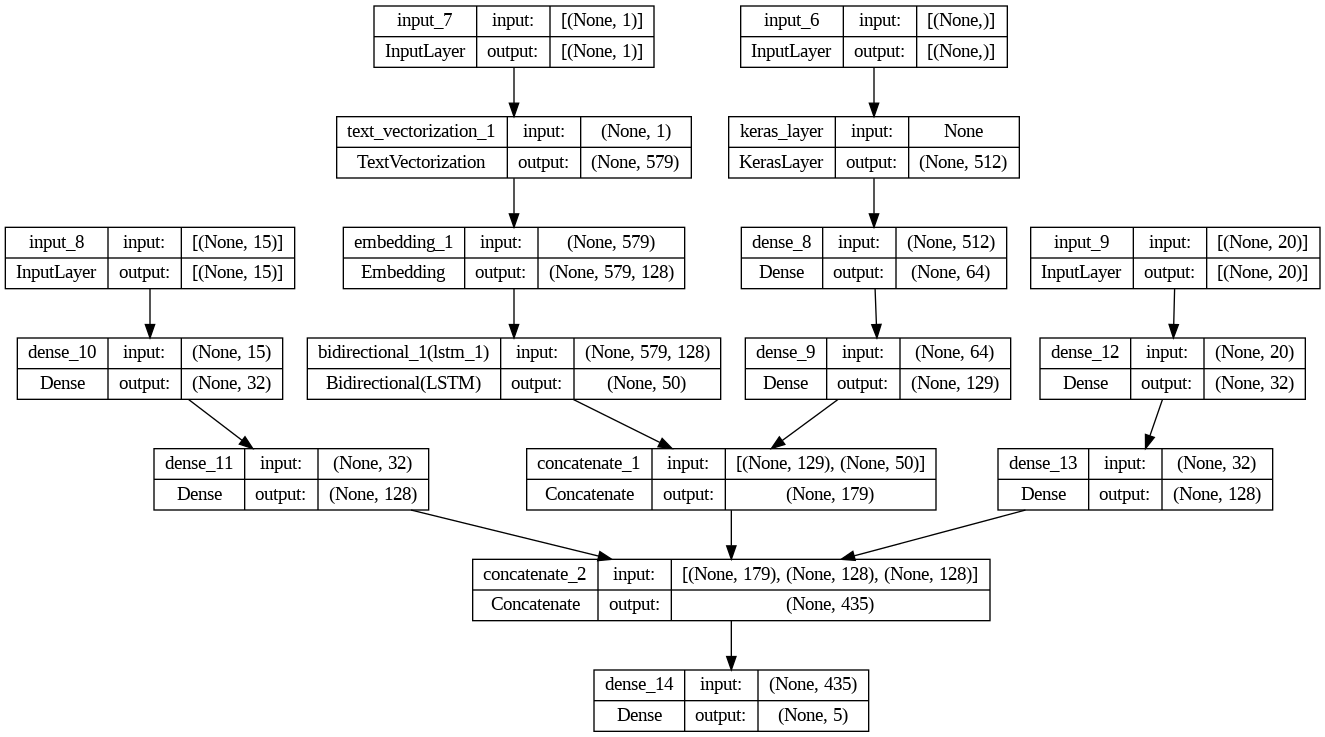

In [ ]:
#plotting the trybrid model
tf.keras.utils.plot_model(trybrid_model,show_shapes=True)

In [ ]:
#Craeting a performant dataset for the trybrid model
trybrid_train_dataset_sen=tf.data.Dataset.from_tensor_slices((train_sentences,char_train_sentences,train_df['line_number'],train_df['total_lines']))
trybrid_train_label_dataset=tf.data.Dataset.from_tensor_slices(train_ohe_target)
trybrid_train_dataset=tf.data.Dataset.zip((trybrid_train_dataset_sen,trybrid_train_label_dataset)).batch(32).prefetch(tf.data.AUTOTUNE)

trybrid_train_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
#Same for the valiadation dataset
trybrid_val_dataset_sen=tf.data.Dataset.from_tensor_slices((val_sentences,char_val_sentences,val_df['line_number'],val_df['total_lines']))
trybrid_val_label_dataset=tf.data.Dataset.from_tensor_slices(val_ohe_target)
trybrid_val_dataset=tf.data.Dataset.zip((trybrid_val_dataset_sen,trybrid_val_label_dataset)).batch(32).prefetch(tf.data.AUTOTUNE)

trybrid_val_dataset

<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
#Compilng the model
trybrid_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),optimizer=tf.keras.optimizers.Adam(),metrics='accuracy')

In [ ]:
#Fitting the trybrid model
trybrid_model_history=trybrid_model.fit(trybrid_train_dataset,steps_per_epoch=(0.30*len(trybrid_train_dataset)),
                                        validation_data=trybrid_val_dataset,validation_steps=(0.15*len(trybrid_val_dataset)),
                                        epochs=8,verbose=1,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',restore_best_weights=True,patience=0,verbose=1)])

Epoch 1/8
1688/1688 [==============================] - 99s 51ms/step - loss: 1.1079 - accuracy: 0.7204 - val_loss: 0.9817 - val_accuracy: 0.8059
Epoch 2/8
1688/1688 [==============================] - 84s 50ms/step - loss: 0.9726 - accuracy: 0.8063 - val_loss: 0.9485 - val_accuracy: 0.8204
Epoch 3/8
1688/1688 [==============================] - 83s 49ms/step - loss: 0.9526 - accuracy: 0.8181 - val_loss: 0.9386 - val_accuracy: 0.8316
Epoch 4/8
 560/1688 [========>.....................] - ETA: 51s - loss: 0.9454 - accuracy: 0.8254

1688/1688 [==============================] - 32s 19ms/step - loss: 0.9454 - accuracy: 0.8254 - val_loss: 0.9328 - val_accuracy: 0.8308


In [ ]:
trybrid_model.evaluate(trybrid_val_dataset)

945/945 [==============================] - 25s 27ms/step - loss: 0.9384 - accuracy: 0.8270


[0.9384111762046814, 0.8270223736763]

In [ ]:
trybrid_model_preds_probs=trybrid_model.predict(trybrid_val_dataset)
trybrid_model_preds=np.argmax(trybrid_model_preds_probs,axis=1)
trybrid_model_preds

945/945 [==============================] - 26s 27ms/step


array([0, 0, 0, ..., 4, 4, 1])

In [ ]:
trybrid_model_results=evaluation_metrics(le_val_target,trybrid_model_preds)
trybrid_model_results

{'Score': 0.828975241625844,
 'precision': 0.8310683192524784,
 'recall': 0.828975241625844,
 'F1_score': 0.8261491990755547}

In [ ]:
### Comaparing all the models that we created for this project
comparison_df=pd.DataFrame({'Baseline model':baseline_results,
                            'Token embedding Conv1d Model':conv_model_results,
                            'pretrained USE token embedding model':fe_model_results,
                            'conv1d_model_char_embeddings':conv1d_model_char_results,
                            'Hybrid model':hybrid_model_results,
                            'Tribrid model results':trybrid_model_results
                            })

In [ ]:
comparison_df.head()

,Baseline model,Token embedding Conv1d Model,pretrained USE token embedding model,conv1d_model_char_embeddings,Hybrid model,Tribrid model results
Score,0.716675,0.820436,0.758705,0.725407,0.721435,0.828975
precision,0.712432,0.821196,0.755140,0.724152,0.732419,0.831068
recall,0.716675,0.820436,0.758705,0.725407,0.721435,0.828975
F1_score,0.692510,0.817753,0.754368,0.713515,0.716794,0.826149


In [ ]:
comparison_df=comparison_df.transpose()

In [ ]:
comparison_df.head()

,Score,precision,recall,F1_score
Baseline model,0.716675,0.712432,0.716675,0.692510
Token embedding Conv1d Model,0.820436,0.821196,0.820436,0.817753
pretrained USE token embedding model,0.758705,0.755140,0.758705,0.754368
conv1d_model_char_embeddings,0.725407,0.724152,0.725407,0.713515
Hybrid model,0.721435,0.732419,0.721435,0.716794


In [ ]:
comparison_df['precision']=comparison_df['precision']
comparison_df.head()

,Score,precision,recall,F1_score
Baseline model,0.716675,0.712432,0.716675,0.692510
Token embedding Conv1d Model,0.820436,0.821196,0.820436,0.817753
pretrained USE token embedding model,0.758705,0.755140,0.758705,0.754368
conv1d_model_char_embeddings,0.725407,0.724152,0.725407,0.713515
Hybrid model,0.721435,0.732419,0.721435,0.716794


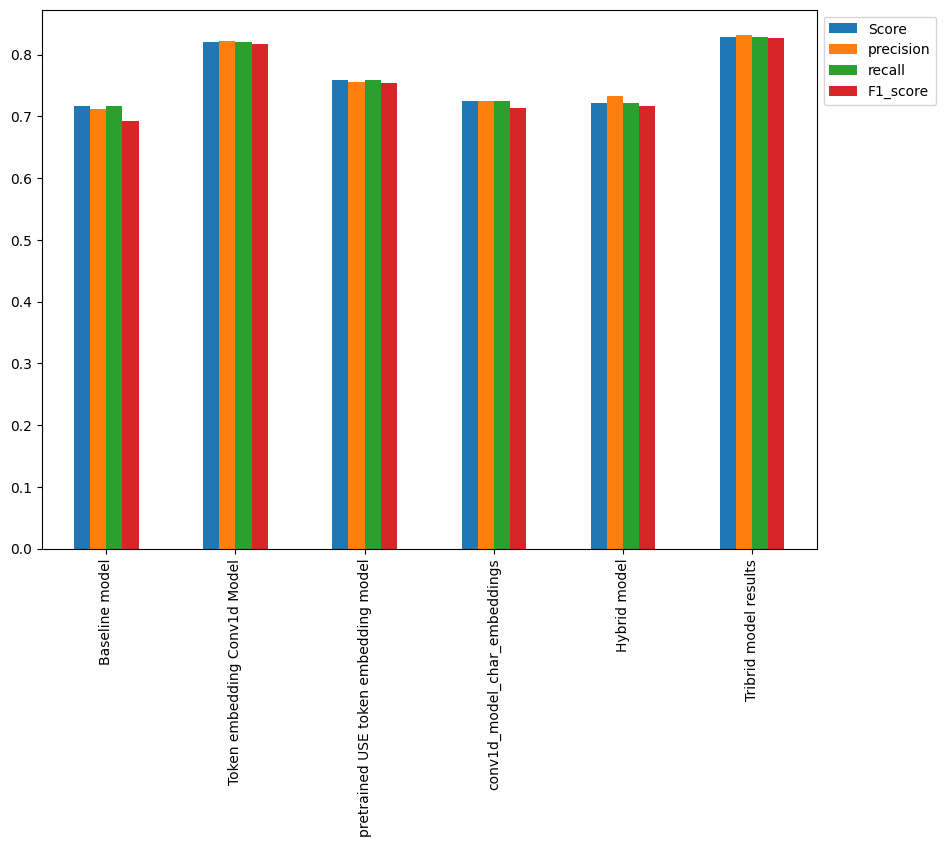

In [ ]:
#Plotting the bar graph for different model comaparison
comparison_df.plot(kind='bar',figsize=(10,7)).legend(bbox_to_anchor=(1,1))

<Axes: >

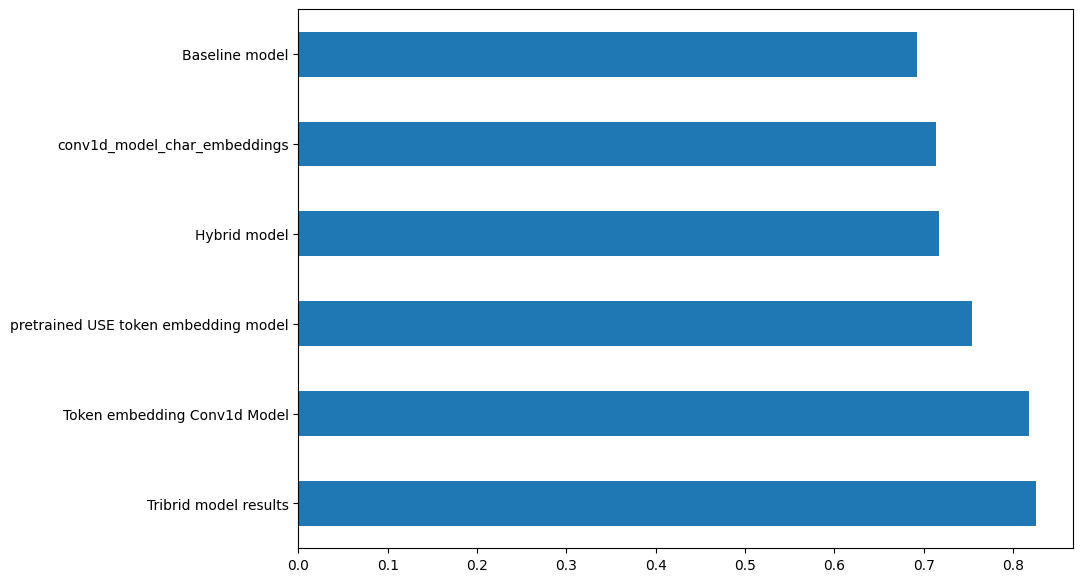

In [ ]:
#Plotting just the f1_score of different models for comparison
comparison_df['F1_score'].sort_values(ascending=False).plot(kind='barh',figsize=(10,7))

In [ ]:
#Model's performance on each individual classes
from sklearn.metrics import classification_report
cr=classification_report(le_val_target,trybrid_model_preds,output_dict=True)

In [ ]:
cr_df=pd.DataFrame(cr)
cr_df=cr_df.transpose()
cr_df.head(10)

,precision,recall,f1-score,support
0,0.681615,0.797622,0.735070,3449.000000
1,0.859187,0.812309,0.835091,4582.000000
2,0.870529,0.874548,0.872534,9964.000000
3,0.802915,0.486953,0.606235,2376.000000
4,0.837198,0.884158,0.860038,9841.000000
accuracy,0.828975,0.828975,0.828975,0.828975
macro avg,0.810289,0.771118,0.781794,30212.000000
weighted avg,0.831068,0.828975,0.826149,30212.000000


In [ ]:
cr_df.drop(['accuracy','macro avg','weighted avg'],axis='rows',inplace=True)

In [ ]:
cr_df['classes']=le.classes_

Text(0, 0.5, 'Classes')

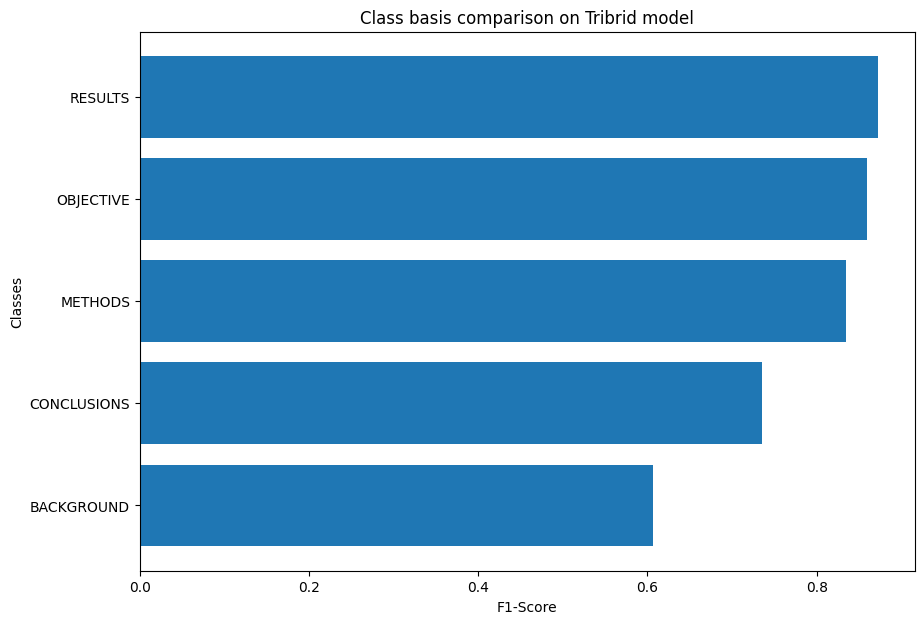

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.barh(cr_df['classes'],cr_df['f1-score'].sort_values(ascending=True))
plt.title('Class basis comparison on Tribrid model')
plt.xlabel('F1-Score')
plt.ylabel('Classes')

### Checking on the most wrong predictions with the highest porbablility

In [ ]:
wrong_df=pd.DataFrame({"Model's prediction":trybrid_model_preds,
 "True prediction":le_val_target,
 'Sentence':val_sentences,
 'prediction_probabilities':trybrid_model_preds_probs.max(axis=1)})

In [ ]:
wrong_df.head()

,Model's prediction,True prediction,Sentence,prediction_probabilities
0,0,0,ige sensitization to aspergillus fumigatus and...,0.534731
1,0,0,it is not clear whether these patients would b...,0.502258
2,0,3,we sought to determine whether a @-month cours...,0.418734
3,2,2,asthmatic patients who were ige sensitized to ...,0.734488
4,2,2,primary outcomes were improvement in quality o...,0.626734


In [ ]:
wrong_df_final=wrong_df[wrong_df["Model's prediction"]!=wrong_df['True prediction']]
wrong_df_final.head()

,Model's prediction,True prediction,Sentence,prediction_probabilities
2,0,3,we sought to determine whether a @-month cours...,0.418734
19,1,4,the combination attenuated a greater number of...,0.490175
24,2,3,we tested the impact of conceptual instruction...,0.551555
25,0,3,we also examined the learning processes suppor...,0.273016
28,2,4,providing conceptual instruction first resulte...,0.293947


In [ ]:
wrong_df_final.sort_values(by='prediction_probabilities',ascending=False,inplace=True)

<ipython-input-140-ba2f64ca3882>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_df_final.sort_values(by='prediction_probabilities',ascending=False,inplace=True)


In [ ]:
wrong_df_final.head()

,Model's prediction,True prediction,Sentence,prediction_probabilities
29986,2,4,the primary outcome was days alive and out of ...,0.936952
10034,2,4,secondary outcomes included time to tb treatme...,0.934476
28193,2,4,primary outcome measures were symptom self-rat...,0.931128
23574,2,4,secondary outcomes were complete excision at e...,0.924751
29987,2,4,secondary outcomes included measures of cardio...,0.921467


In [ ]:
wrong_df_final.reset_index(drop=True,inplace=True)

In [ ]:
wrong_df_final.rename({"Model's prediction":"Model prediction"},axis='columns',inplace=True)

<ipython-input-143-1b143256cf42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_df_final.rename({"Model's prediction":"Model prediction"},axis='columns',inplace=True)


In [ ]:
len(wrong_df_final),len(wrong_df)

(5167, 30212)

In [ ]:
import random
sample=random.sample(range(0,500),10)
for i in sample:
  print(f'Sentence: {wrong_df_final["Sentence"][i]} \nprediction probabilities: {wrong_df_final["prediction_probabilities"][i]},\nTrue label: {wrong_df_final["True prediction"][i]} \nModel prediction:{wrong_df_final["Model prediction"][i]}')

Sentence: elderly heart failure patients from the cibis-eld trial were invited to participate in a follow-up examination @ years after the initial @-week bb up-titration period . 
prediction probabilities: 0.8305252194404602,
True label: 4 
Model prediction:2
Sentence: gender-related differences were noted in factors associated with and predictive of physical inactivity . 
prediction probabilities: 0.818710207939148,
True label: 1 
Model prediction:4
Sentence: at @ months after surgery , intraocular high-order aberration was measured by a tracey-itrace wavefront aberrometer at a pupil diameter of @ mm in an absolutely dark room and statistically compared between two groups . 
prediction probabilities: 0.760543167591095,
True label: 2 
Model prediction:4
Sentence: those in group b were needled at non-acupoint -lsb- @ mm beside waiguan ( sj@ ) -rsb- , whereas those in group c did not receive any treatment . 
prediction probabilities: 0.8435123562812805,
True label: 2 
Model prediction:4


In [ ]:
# A confusion matrix for Tribrid model
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(le_val_target,trybrid_model_preds)
cm

array([[2751,  130,  278,  266,   24],
       [  76, 3722,   73,    0,  711],
       [ 149,  132, 8714,   18,  951],
       [1044,    2,  167, 1157,    6],
       [  16,  346,  778,    0, 8701]])

Text(0.5, 1.0, 'Confusion Matrix')

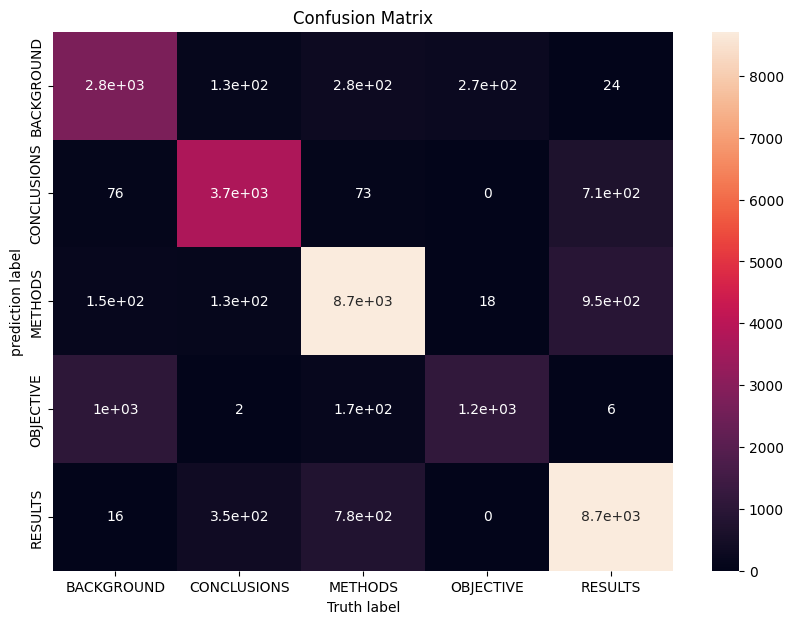

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,xticklabels=list(le.classes_),yticklabels=list(le.classes_))
plt.xlabel('Truth label')
plt.ylabel('prediction label')
plt.title('Confusion Matrix')

### Saving the trybrid model

In [ ]:
trybrid_model.save('/content/RCT Classification/Trybrid_model_final',save_format='tf')

###  Saving the one hot encoder

In [ ]:
import pickle
with open ('/content/One Hot Encoder/ohe.pkl','wb') as f:
  pickle.dump(ohe,f)

In [ ]:
some_rct='''Adrenergic activation is thought to be an important determinant of outcome in subjects with chronic heart failure ( CHF ) , but baseline or serial changes in adrenergic activity have not been previously investigated in a large patient sample treated with a powerful antiadrenergic agent .
Systemic venous norepinephrine was measured at baseline , 3 months , and 12 months in the beta-Blocker Evaluation of Survival Trial ( BEST ) , which compared placebo treatment with the beta-blocker/sympatholytic agent bucindolol . Baseline norepinephrine level was associated with a progressive increase in rates of death or death plus CHF hospitalization that was independent of treatment group .
On multivariate analysis , baseline norepinephrine was also a highly significant ( P < 0.001 ) independent predictor of death . In contrast , the relation of the change in norepinephrine at 3 months to subsequent clinical outcomes was complex and treatment group-dependent
In the placebo-treated group but not in the bucindolol-treated group , marked norepinephrine increase at 3 months was associated with increased subsequent risks of death or death plus CHF hospitalization . In the bucindolol-treated group but not in the placebo-treated group , the 1st quartile of marked norepinephrine reduction was associated with an increased mortality risk .
A likelihood-based method indicated that 18 % of the bucindolol group but only 1 % of the placebo group were at an increased risk for death related to marked reduction in norepinephrine at 3 months .
In BEST , a subset of patients treated with bucindolol had an increased risk of death as the result of sympatholysis , which compromised the efficacy of this third-generation beta-blocker .'''

In [ ]:
some_rct

'Adrenergic activation is thought to be an important determinant of outcome in subjects with chronic heart failure ( CHF ) , but baseline or serial changes in adrenergic activity have not been previously investigated in a large patient sample treated with a powerful antiadrenergic agent .\nSystemic venous norepinephrine was measured at baseline , 3 months , and 12 months in the beta-Blocker Evaluation of Survival Trial ( BEST ) , which compared placebo treatment with the beta-blocker/sympatholytic agent bucindolol . Baseline norepinephrine level was associated with a progressive increase in rates of death or death plus CHF hospitalization that was independent of treatment group .\nOn multivariate analysis , baseline norepinephrine was also a highly significant ( P < 0.001 ) independent predictor of death . In contrast , the relation of the change in norepinephrine at 3 months to subsequent clinical outcomes was complex and treatment group-dependent\nIn the placebo-treated group but not

# Flask Application

In [ ]:
! pip install pyngrok

In [ ]:
!unzip '/content/drive/MyDrive/RCT Classification/static.zip' -d '/content/static'

Archive:  /content/drive/MyDrive/RCT Classification/static.zip
   creating: /content/static/.ipynb_checkpoints/
   creating: /content/static/css/
   creating: /content/static/css/.ipynb_checkpoints/
  inflating: /content/static/css/main.css  
  inflating: /content/static/css/style.css  


In [ ]:
!unzip '/content/drive/MyDrive/RCT Classification/templates.zip' -d '/content/templates'

Archive:  /content/drive/MyDrive/RCT Classification/templates.zip
   creating: /content/templates/.ipynb_checkpoints/
  inflating: /content/templates/result.html  
  inflating: /content/templates/index.html  


In [ ]:
from pyngrok import ngrok
port_no=5000

In [ ]:
from flask import Flask,request,render_template
import tensorflow as tf
import pickle
import numpy as np
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
app=Flask(__name__)
ngrok.set_auth_token('2dW7qeQXYf1RbmtHWu1mUriKQnC_6qjCtetiLtbfKXVY6R1ZZ')
public_url = ngrok.connect(port_no).public_url

@app.route('/',methods=['GET'])
def homepage():
  return render_template('index.html')

@app.route('/Bifurcation',methods=['POST'])
def main_function():
  if request.method=='POST':
    some_rct=str(request.form.get('content'))
    from nltk.tokenize import sent_tokenize
    list_of_sent=sent_tokenize(some_rct)

    char_rct_sent=[]
    for i in list_of_sent:
      char_rct=''
      for j in i:
        char_rct=char_rct+' '+i
      char_rct_sent.append(char_rct)

    def total_lines_maker(corpus):
      total_length=len(corpus.split('.'))
      total_length_parameter=[]
      sentence_no=[]
      for i in range(0,len(list_of_sent)):
        total_length_parameter.append(len(list_of_sent))
        sentence_no.append(i)

      return total_length_parameter,sentence_no

    total_lines,sentence_no=total_lines_maker(some_rct)

    loaded_model=tf.keras.models.load_model('/content/drive/MyDrive/RCT Classification/Trybrid_model_final')

    results=loaded_model.predict((tf.constant(list_of_sent),tf.constant(char_rct_sent),tf.constant(sentence_no),tf.constant(total_lines)))

    ohe=pickle.load(open('/content/drive/MyDrive/RCT Classification/One Hot Encoder/ohe.pkl','rb'))

    classes=ohe.inverse_transform(results)

    Categories=np.squeeze(classes,axis=1).tolist()

    final_list=[]

    for i,j in zip(Categories,list_of_sent):
      final_list.append({'Sentence':j,'Category':i})


    return render_template('result.html',result=final_list)

  else:
    return render_template('index.html')

print(public_url)

if __name__=='__main__':
  app.run(port=port_no)




https://fc63-35-222-156-165.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [22/May/2024 23:02:48] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [22/May/2024 23:02:49] "GET /background.jpg HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [22/May/2024 23:02:49] "GET /favicon.ico HTTP/1.1" 404 -


1/1 [==============================] - 1s 1s/step


INFO:werkzeug:127.0.0.1 - - [22/May/2024 23:03:49] "POST /Bifurcation HTTP/1.1" 200 -
